**Dranchuk and Abu-Kasem (1975)**

The gas deviation factor (*Z*) is by definition the ratio of the volume actually occupied by a gas at a given pressure and temperature to the volume it would occupy if it behaved ideally:
$$ Z=\frac{V_{actual}}{V_{ideal}}$$

*Z* can be estimated from its specific gravity. The method uses a correlation to estimate pseudocritical temperature and pseudocritical pressure values from the specific gravity. Dranchuk and Abou-Kassem fitted an EOS to the Standing and Katz data that is more convinient for estimating *Z* in computer programs. DAK is based on the generalized Starling EOS.

In [ ]:
# Easily label line(s) using matplotlib
!pip install matplotlib-label-lines

In [ ]:
import numpy as np
from numpy import exp
import matplotlib.pyplot as plt
from labellines import labelLine, labelLines
%matplotlib inline

In [ ]:
#Dranchuk and Abu-Kasem (1975)
def DAKZ(Pr,Tr):
  #input: pseudoreduced pressure(Pr) and pseudoreduced temperature (Tr)
  #output: compressibility factor (Z)
    #Coefficients
    A1=0.3265
    A2=-1.0700
    A3=-0.5339
    A4=0.01569
    A5=-0.05165
    A6=0.5475
    A7=-0.7361
    A8=0.1844
    A9=0.1056
    A10=0.6134
    A11=0.7210
    error=10
    it=0
    #A starting value for Z provided by Papay or Z=0.7
    z_guess = 0.7 #1-(3.52*Pr)/(Tr*10**0.9813)+(0.274*Pr**2)/(Tr*10**0.8157)
    #Numerical implementation
    while error >= 1e-07:
      C=(0.27*Pr)/Tr
      B1=C*(A1+(A2/Tr)+(A3/Tr**3)+(A4/Tr**4)+(A5/Tr**5))
      B2=C**2*(A6+(A7/Tr)+(A8/Tr**2))
      B3=C**5*(A9*((A7/Tr)+(A8/Tr**2)))
      B4=C**2*(A10/Tr**3)
      B5=C**2*A11
      B6=B4*B5
      #Newton-Raphson algorithm
      F=z_guess-(B1*z_guess**-1)-(B2*z_guess**-2)+(B3*z_guess**-5)-((B4*z_guess**-2)+(B6*z_guess**-4))*exp(-B5*z_guess**-2)-1
      F1=1+(B1*z_guess**-2)+(2*B2*z_guess**-3)-(5*B3*z_guess-6)+((2*B4*z_guess**-3)-(2*B4*B5*z_guess**-5)+(4*B6*z_guess-5)-(2*B5*B6*z_guess**-7))*exp(-B5*z_guess**-2)
      z_nextguess= z_guess-F/F1
      error = abs(z_nextguess-z_guess)
      z_guess=z_nextguess
      it +=1
      #print('number of iteration= ',str(it))
    return round(z_guess,4)

## Examples

In [ ]:
# If you want to return only the value of z
DAKZ(3.1995,1.5006)

0.7731

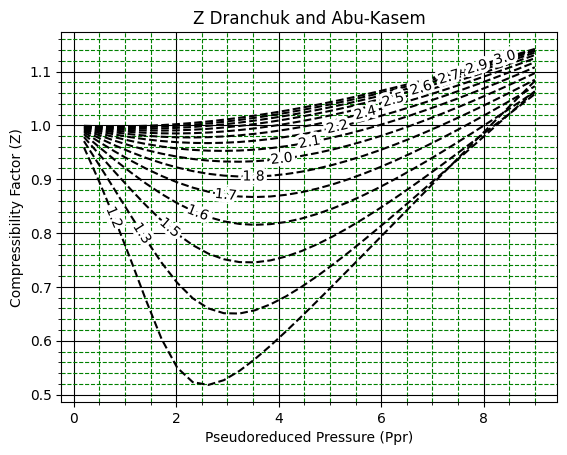

In [ ]:
# If you want to see the graph
Pr=np.linspace(0.2,9,30) #0.2<Pr<30
Tr=np.linspace(1.2,3,15) #1.0<Tr<3.0
zf=np.zeros(len(Pr))

plt.figure("Z_factor")

for i in range(0,len(Tr)):
    for j in range(0,len(Pr)):
      zf[j] = DAKZ(Pr[j], Tr[i])
    plt.plot(Pr,zf,'k--',label=round(Tr[i],1))

plt.title('Z Dranchuk and Abu-Kasem')
plt.xlabel('Pseudoreduced Pressure (Ppr)')
plt.ylabel('Compressibility Factor (Z)')
plt.minorticks_on()
plt.grid(True, which='major', color='k', linestyle='-')
plt.grid(True, which='minor', color='g', linestyle='--')
labelLines(plt.gca().get_lines(), zorder=2.5)
#plt.savefig('z-Dranchuk-Kassem.png',dpi=300)
plt.show()